In [ ]:
!nvidia-smi

Sat Jul 13 08:59:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# **Step 1 : Mounting to Gdrive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Step 2: Installing Ultralytics**

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 8.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

# **Step 3:Navigate to the  Dataset**

In [ ]:
%cd /content/drive/MyDrive/dataset

/content/drive/MyDrive/dataset


# **Step 4: Train the YOLOv8 Classification Model**

In [ ]:
from ultralytics import YOLO

# Load a YOLO model for classification (e.g., YOLOv8s)
model = YOLO('yolov8n-cls.pt')  # You can also use 'yolov8m-cls.pt', 'yolov8l-cls.pt', etc.

# Train the model
model.train(data='/content/drive/MyDrive/dataset', epochs=20, batch=16, imgsz=224)

100%|██████████| 5.31M/5.31M [00:00<00:00, 170MB/s]


Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/dataset, epochs=20, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 6.25M/6.25M [00:00<00:00, 214MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/dataset/train... 195 images, 0 corrupt: 100%|██████████| 195/195 [03:46<00:00,  1.16s/it]

train: New cache created: /content/drive/MyDrive/dataset/train.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/dataset/val... 85 images, 0 corrupt: 100%|██████████| 85/85 [01:35<00:00,  1.13s/it]

val: New cache created: /content/drive/MyDrive/dataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20     0.403G      1.789         16        224:  31%|███       | 4/13 [00:02<00:04,  2.00it/s]


100%|██████████| 755k/755k [00:00<00:00, 94.2MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all      0.247          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 28.18it/s]

                   all      0.424          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 19.22it/s]


                   all      0.741          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 29.07it/s]

                   all      0.812          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.34it/s]

                   all        0.8          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 27.88it/s]

                   all      0.847          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 26.09it/s]

                   all      0.859          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 38.65it/s]

                   all      0.871          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 31.74it/s]

                   all      0.882          1



      Epoch    GPU_mem       loss  Instances       Size


      10/20     0.375G     0.4294          3        224: 100%|██████████| 13/13 [00:44<00:00,  3.39s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 14.33it/s]

                   all      0.894          1



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem       loss  Instances       Size


      11/20     0.375G     0.3378          3        224: 100%|██████████| 13/13 [00:43<00:00,  3.38s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 15.30it/s]

                   all      0.894          1



      Epoch    GPU_mem       loss  Instances       Size


      12/20     0.375G     0.3133          3        224: 100%|██████████| 13/13 [00:48<00:00,  3.76s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.69it/s]


                   all      0.882          1

      Epoch    GPU_mem       loss  Instances       Size


      13/20     0.373G     0.3908          3        224: 100%|██████████| 13/13 [00:49<00:00,  3.80s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 19.45it/s]

                   all      0.894          1



      Epoch    GPU_mem       loss  Instances       Size


      14/20     0.375G     0.2571          3        224: 100%|██████████| 13/13 [00:48<00:00,  3.75s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 16.79it/s]

                   all      0.882          1



      Epoch    GPU_mem       loss  Instances       Size


      15/20     0.375G     0.2076          3        224: 100%|██████████| 13/13 [00:48<00:00,  3.76s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 18.50it/s]

                   all      0.894          1



      Epoch    GPU_mem       loss  Instances       Size


      16/20     0.375G     0.2221          3        224: 100%|██████████| 13/13 [00:48<00:00,  3.74s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 21.11it/s]

                   all      0.894          1



      Epoch    GPU_mem       loss  Instances       Size


      17/20     0.375G     0.2122          3        224: 100%|██████████| 13/13 [00:47<00:00,  3.69s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 13.10it/s]

                   all      0.894          1



      Epoch    GPU_mem       loss  Instances       Size


      18/20     0.375G     0.3042          3        224: 100%|██████████| 13/13 [00:49<00:00,  3.80s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 16.73it/s]

                   all      0.894          1



      Epoch    GPU_mem       loss  Instances       Size


      19/20     0.375G      0.207          3        224: 100%|██████████| 13/13 [00:46<00:00,  3.55s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 33.85it/s]

                   all      0.894          1



      Epoch    GPU_mem       loss  Instances       Size


      20/20     0.375G     0.2597          3        224: 100%|██████████| 13/13 [00:48<00:00,  3.73s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 24.66it/s]

                   all      0.894          1



20 epochs completed in 0.283 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,441,285 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/dataset/train... found 195 images in 5 classes ✅ 
val: /content/drive/MyDrive/dataset/val... found 85 images in 5 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:20<00:00,  6.87s/it]


                   all      0.894          1
Speed: 0.3ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d2cf57f23b0>
curves: []
curves_results: []
fitness: 0.9470588266849518
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8941176533699036, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9470588266849518}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.25508544024299173, 'inference': 0.6487341488108915, 'loss': 0.0005974489099839155, 'postprocess': 0.000513301176183364}
task: 'classify'
top1: 0.8941176533699036
top5: 1.0

# **Step 5:Evaluate the Model**

In [ ]:
results = model.val(data='/content/drive/MyDrive/dataset')
print(results)

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,441,285 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/dataset/train... found 195 images in 5 classes ✅ 
val: /content/drive/MyDrive/dataset/val... found 85 images in 5 classes ✅ 
test: None...


val: Scanning /content/drive/MyDrive/dataset/val... 85 images, 0 corrupt: 100%|██████████| 85/85 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:36<00:00,  6.13s/it]


                   all      0.894          1
Speed: 0.1ms preprocess, 5.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d2c66bc87c0>
curves: []
curves_results: []
fitness: 0.9470588266849518
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8941176533699036, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9470588266849518}
save_dir: PosixPath('runs/classify/train2')
speed: {'preprocess': 0.0973813674029182, 'inference': 5.422306060791016, 'loss': 0.001121969784007353, 'postprocess': 0.0012846554026884193}
task: 'classify'
top1: 0.8941176533699036
top5: 1.0



image 1/1 /content/drive/MyDrive/predict1.jpg: 224x224 type4 0.52, type6 0.30, type5 0.09, type3 0.04, type7 0.04, 3.3ms
Speed: 24.4ms preprocess, 3.3ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


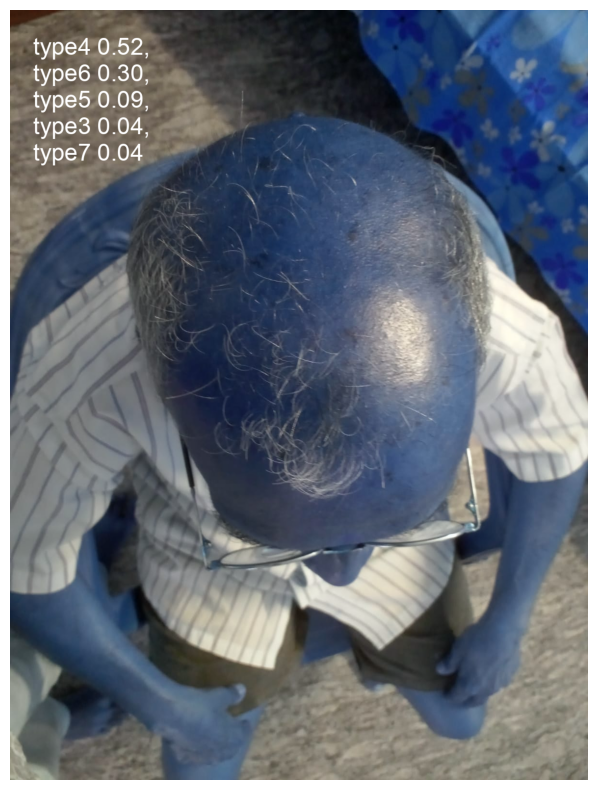

In [ ]:
# Re-import necessary libraries
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image

# Ensure the YOLO model is loaded
model = YOLO("/content/drive/MyDrive/dataset/runs/classify/train/weights/best.pt")

# Function to predict and visualize results
def predict_and_visualize(model, image_path):
    # Perform prediction
    results = model.predict(source=image_path)

    # Display the image with predictions
    results_img = results[0].plot(show=False)
    plt.figure(figsize=(10, 10))
    plt.imshow(results_img)
    plt.axis('off')
    plt.show()

# Path to your image
image_path = "/content/drive/MyDrive/predict1.jpg"

# Predict and visualize
predict_and_visualize(model, image_path)





image 1/1 /content/drive/MyDrive/prajwaltop.jpg: 224x224 type4 0.92, type3 0.04, type5 0.02, type6 0.01, type7 0.00, 4.8ms
Speed: 12.4ms preprocess, 4.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


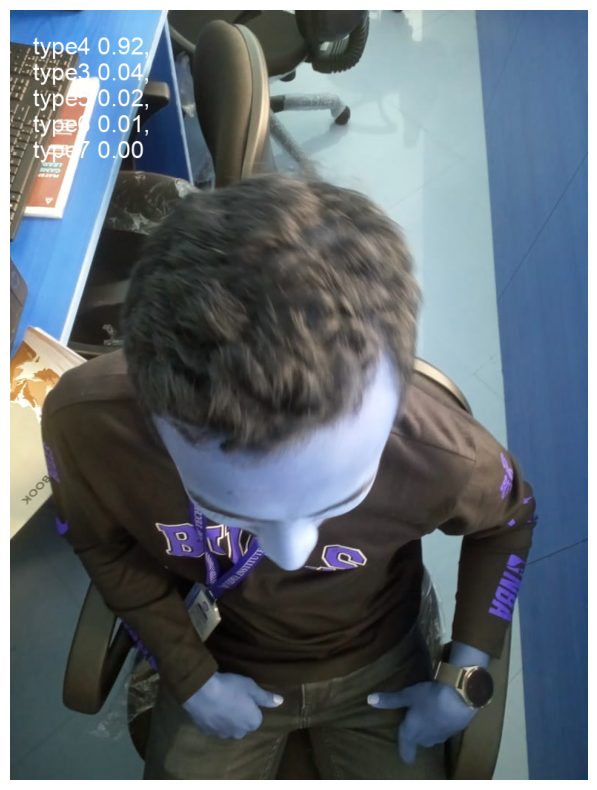

In [ ]:
# Re-import necessary libraries
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image

# Ensure the YOLO model is loaded
model = YOLO("/content/drive/MyDrive/best.pt")

# Function to predict and visualize results
def predict_and_visualize(model, image_path):
    # Perform prediction
    results = model.predict(source=image_path)

    # Display the image with predictions
    results_img = results[0].plot(show=False)
    plt.figure(figsize=(10, 10))
    plt.imshow(results_img)
    plt.axis('off')
    plt.show()

# Path to your image
image_path = "/content/drive/MyDrive/prajwaltop.jpg"

# Predict and visualize
predict_and_visualize(model, image_path)




image 1/1 /content/drive/MyDrive/17.jpg: 224x224 type7 0.73, type6 0.25, type5 0.01, type4 0.00, type3 0.00, 3.2ms
Speed: 138.0ms preprocess, 3.2ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


100%|██████████| 755k/755k [00:00<00:00, 26.4MB/s]


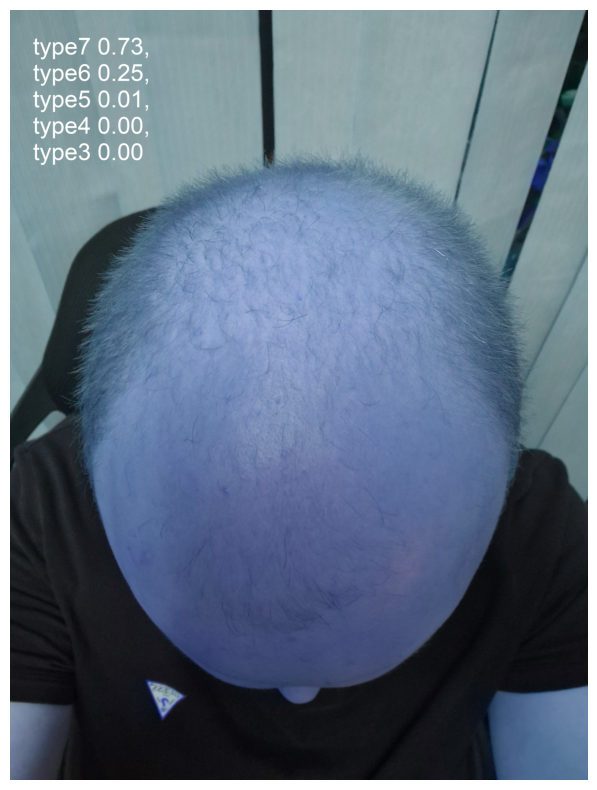

In [ ]:
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image

# Ensure the YOLO model is loaded
model = YOLO("/content/drive/MyDrive/best.pt")

# Function to predict and visualize results
def predict_and_visualize(model, image_path):
    # Perform prediction
    results = model.predict(source=image_path)

    # Display the image with predictions
    results_img = results[0].plot(show=False)
    plt.figure(figsize=(10, 10))
    plt.imshow(results_img)
    plt.axis('off')
    plt.show()

# Path to your image
image_path = "/content/drive/MyDrive/17.jpg"

# Predict and visualize
predict_and_visualize(model, image_path)

